# Loading data

The csv was downloaded from [lazy programmer's github](https://github.com/lazyprogrammer/machine_learning_examples/blob/master/ann_logistic_extra/ecommerce_data.csv)

In [6]:
import numpy as np
import pandas as pd

data_path = '../data/ecommerce_data.csv'
df = pd.read_csv(data_path)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   is_mobile             500 non-null    int64  
 1   n_products_viewed     500 non-null    int64  
 2   visit_duration        500 non-null    float64
 3   is_returning_visitor  500 non-null    int64  
 4   time_of_day           500 non-null    int64  
 5   user_action           500 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 23.6 KB


<AxesSubplot:>

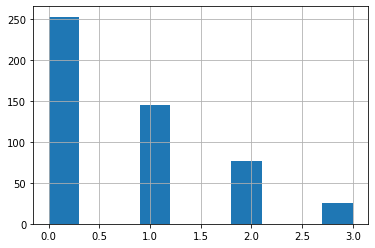

In [7]:
df.user_action.hist()

In [14]:
def get_data():
    df = pd.read_csv(data_path)
    #convert to matrix
    data = df.values

    #splitting X and Y
    X = data[:, :-1]
    Y = data[:, -1]

    #normalizing a couple numerical columns
    X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
    X[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()

    #the categorical column, time of day
    #manually making one-hot encoding
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    X2[:,0:(D-1)] = X[:,0:(D-1)]
    for n in range(N):
        t = int(X[n,D-1])
        X2[n,t+D-1] = 1
    
    return X2, Y

#for the logistic class we're only using binary data
#e.g. where user action is 0 or 1
#so we're dropping all other rows
def get_binary_data():
    X, Y = get_data()
    X2 = X[Y <= 1]
    Y2 = Y[Y <= 1]
    return X2, Y2



Making sure the functions work

In [15]:
X, Y = get_binary_data()

In [18]:
print(X.shape, Y.shape)

(398, 8) (398,)


These functions will now be added to the script `process.py`